In [50]:
import io
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
%matplotlib inline
from nltk.corpus import stopwords
import nltk
nltk.download("stopwords")
stopwords = stopwords.words("english")
import numpy as np
import matplotlib.dates as mdates

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [51]:
def search_in(patern, toSearch):
  files = io.open(toSearch, encoding="windows-1252")
  i=0
  for line in files :
    res=''
    if patern in line:
      for lines in files :
        if(lines!='\n'):
          res+=lines
      return(res)
      


In [52]:
ans20=[]
for i in range(845):
  res=search_in("20 January 2014", str(i)+".txt")
  if(res!=None):
    ans20.append(search_in("20 January 2014", str(i)+".txt"))


In [53]:
for i in range(845):
  res=search_in("01/20/2014", str(i)+".txt")
  if(res!=None):
    print(res)

In [54]:
ans20.sort()
time=[]
final=[]
for i in ans20:
  splited = i.split()
  if splited[0].isnumeric()  and splited[0] not in time:
    time.append(splited[0])
    if len(splited[0])==4:
      final.append(i)



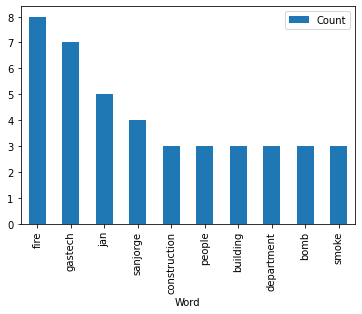

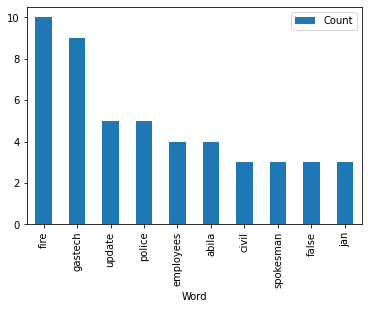

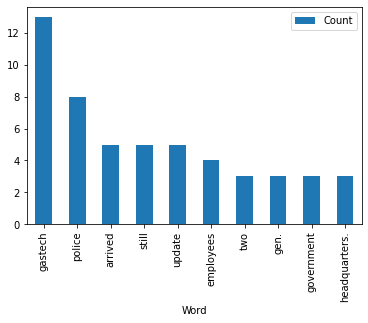

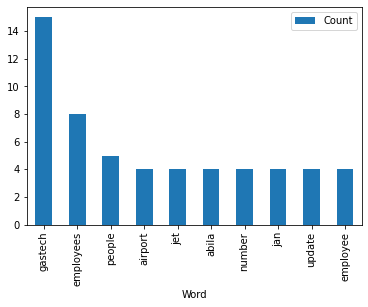

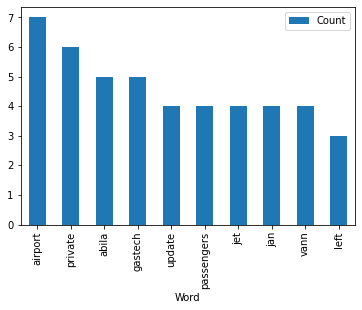

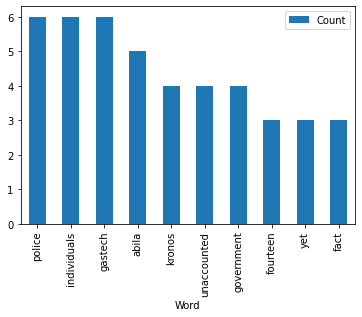

In [55]:
dico={}
count=0
for i in final:
  i = i.replace("-","")
  i = i.replace("20","")
  i = i.replace("2014","")
  i = i.replace("jan","")
  i = i.replace("14","")
  splited = i.lower().split()
  for word in splited:
    if word not in dico:
      if word not in stopwords:
        dico[word]=1
    else:
      dico[word]+=1
  count+=1
  
  if count==10:
    word_counter=Counter(dico)
    lst = word_counter.most_common(10)
    df = pd.DataFrame(lst, columns = ['Word', 'Count'])
    df.plot.bar(x='Word',y='Count')
    count=0
    dico={}

if count>0 and count<10:
    word_counter=Counter(dico)
    lst = word_counter.most_common(10)
    df = pd.DataFrame(lst, columns = ['Word', 'Count'])
    df.plot.bar(x='Word',y='Count')

In [56]:
ans21=[]
for i in range(845):
  res=search_in("21 January 2014", str(i)+".txt")
  if(res!=None):
    ans21.append(search_in("21 January 2014", str(i)+".txt"))


In [57]:
ans21.sort()

In [58]:
final2=[]
for i in ans21:
  splited = i.split()
  if splited[0].isnumeric()  and splited[0] not in time:
    time.append(splited[0])
    if len(splited[0])==4:
      final2.append(i)



In [59]:
dates = [i.split()[0][:2]+":"+i.split()[0][2:] for i in final]
names = [i.split()[3] for i in final]
dates2 =[i.split()[0][:2]+":"+i.split()[0][2:] for i in final2]


In [60]:
def make_hist_for_word(search,dates):
  dico={}
  occurence = []
  n = 0
  labels = [dates[i*10]+"-"+dates[min(i*10+10,len(dates)-1)] for i in range(int(len(dates)/10)+1)]
  labels2 = [dates2[j*10]+"-"+dates2[min(j*10+10,len(dates2)-1)] for j in range(int(len(dates2)/10)+1)]
  labels+=labels2
  for i in range(int(len(dates)/10)+1):
    dico[dates[i*10]+"-"+dates[min(i*10+10,len(dates)-1)]]=0
  for i in range(int(len(dates2)/10)+1):
    dico[dates2[i*10]+"-"+dates2[min(i*10+10,len(dates2)-1)]]=0
  dictlist=[]
  count=0
  start=0
  for i in final:
    splited = i.lower().split()
    for word in splited:
      if search in word:
          dico[dates[start]+"-"+dates[min(start+10,len(dates)-1)]]+=1
          
          occurence.append(n)
    count+=1
    if(count==10):
      start+=10
      n+=1
      count=0
  n+=1
  count=0
  start=0
  for i in final2:
    splited = i.lower().split()
    for word in splited:
      if search in word:
          dico[dates2[start]+"-"+dates2[min(start+10,len(dates2)-1)]]+=1
          occurence.append(n)
    count+=1
    if(count==10):
      start+=10
      n+=1
      count=0
    
  word_counter=Counter(dico)
  for key, value in dico.items():
    temp = [key,value]
    dictlist.append(temp)
 
  lst = word_counter.most_common(10)
  df = pd.DataFrame(dictlist, columns = ['Time', 'Count'])

  df.plot.bar(x='Time',y='Count', title="Count of "+search,)
  
  return occurence, labels

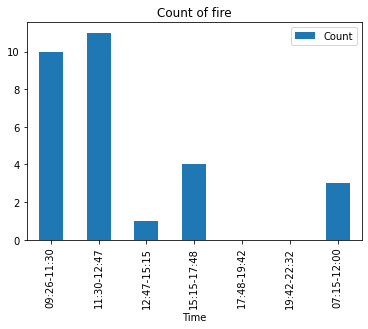

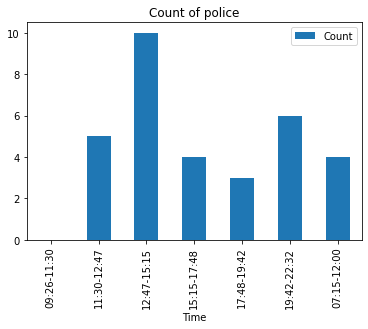

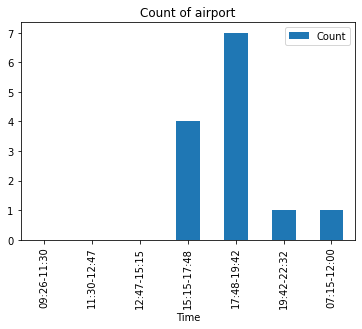

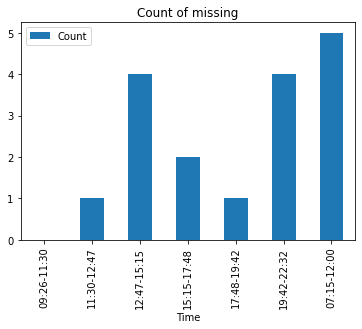

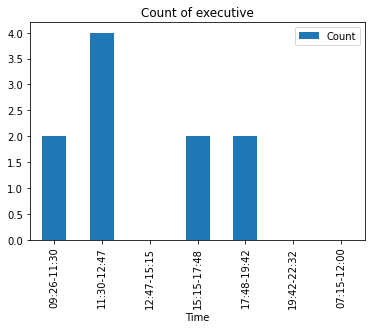

In [61]:
keywords=["fire","police","airport","missing","executive"]
keywords_occurence=[]
for i in keywords :
  occurence, labels = make_hist_for_word(i,dates)
  keywords_occurence.append(occurence)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

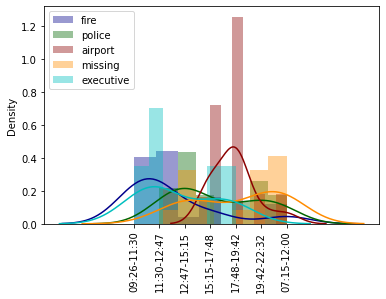

In [63]:
import seaborn as sn
colors = ['darkblue','darkgreen','darkred','darkorange','c']
for i in range(len(keywords_occurence)):
  sn.distplot(keywords_occurence[i], hist=True, kde=True, hist_kws = {"density":True, "stacked":True},
             bins=7, color = colors[i], label=keywords[i])

ticks_locations, _ = plt.xticks()
plt.xticks([i for i in range(7)], labels, rotation=90)
plt.legend(loc="upper left")
plt.show()



In [86]:
files = open("cleaned_january_20.txt")
january_20=files.read()
january_20=january_20.splitlines()
files.close()


In [87]:
files = open("cleaned_january_21.txt")
january_21=files.read()
january_21=january_21.splitlines()
files.close()


In [103]:
dates_20 = [i.split()[0][:2]+":"+i.split()[0][2:] for i in january_20]
names_20 = [i[6:] for i in january_20]


In [104]:
dates_21 = [i.split()[0][:2]+":"+i.split()[0][2:] for i in january_21]
names_21 = [i[6:] for i in january_21]

In [105]:
for i in range(len(names_20)):
  names_20[i] = names_20[i].replace("\\n","\n")

In [106]:
dates = dates_20 + dates_21
names = names_20 + names_21

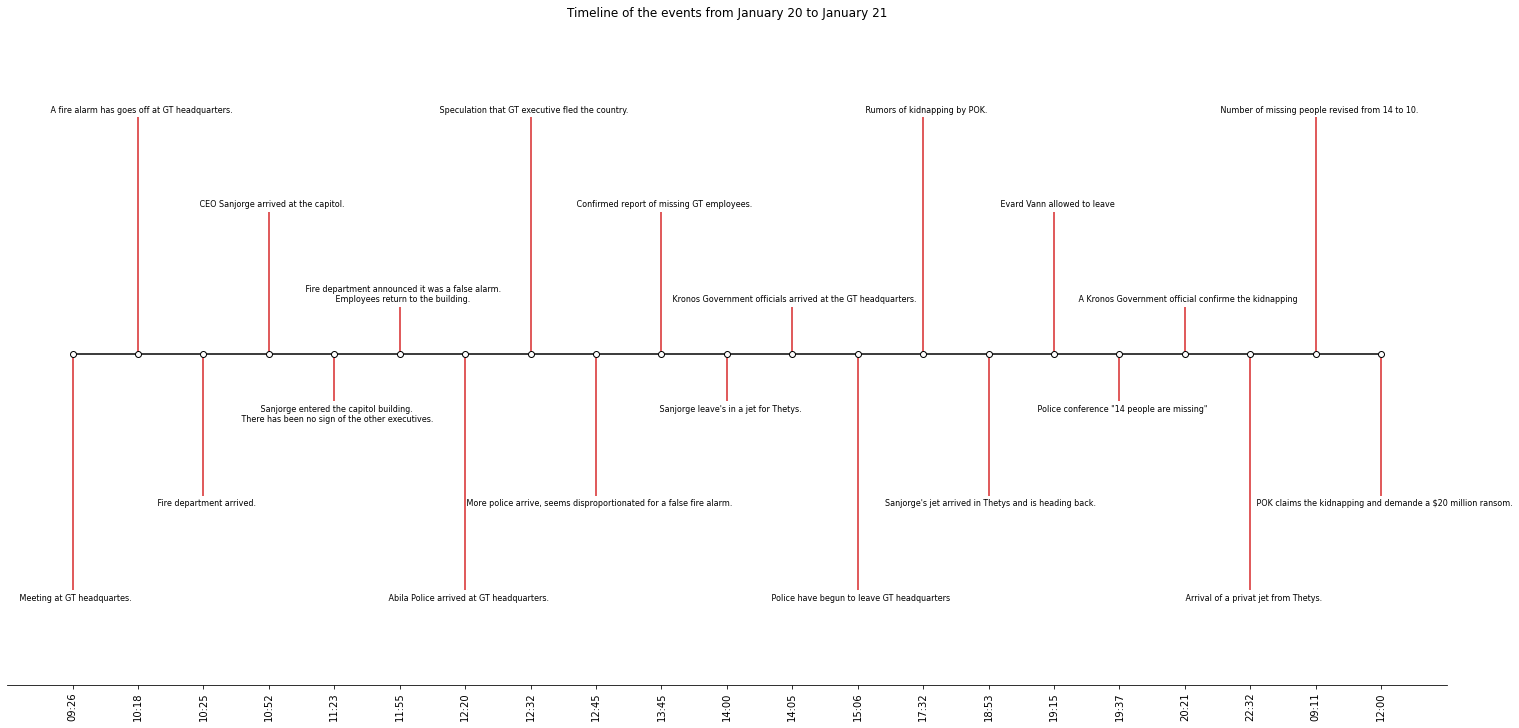

In [107]:
# Choose some nice levels
levels = np.tile([-5, 5, -3, 3, -1, 1],
                 int(np.ceil(len(dates)/6)))[:len(dates)]

# Create figure and plot a stem plot with the date
fig, ax = plt.subplots(figsize=(21, 10), constrained_layout=True)
ax.set(title="Timeline of the events from January 20 to January 21")

markerline, stemline, baseline = ax.stem(dates, levels,
                                         linefmt="C3-", basefmt="k-",
                                         use_line_collection=True)

plt.setp(markerline, mec="k", mfc="w", zorder=3)

# Shift the markers to the baseline by replacing the y-data by zeros.
markerline.set_ydata(np.zeros(len(dates)))

# annotate lines
vert = np.array(['top', 'bottom'])[(levels > 0).astype(int)]
for d, l, r, va in zip(dates, levels, names, vert):
    ax.annotate(r, xy=(d, l), xytext=(2, np.sign(l)*3),
                textcoords="offset points", va=va, ha="center",size=8)
    

# remove y axis and spines
ax.get_yaxis().set_visible(False)
for spine in ["left", "top", "right"]:
    ax.spines[spine].set_visible(False)

ticks_locations, _ = plt.xticks()
plt.xticks(ticks_locations, rotation=90)

ax.margins(y=0.2)
plt.show()